In [1]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import zscore
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

### 1
化工试验例子

In [2]:
data = np.loadtxt('../../../hw/13第13章  偏最小二乘回归分析习题解答/ti13_1.txt')
mu = data.mean(axis=0)
sig = data.std(axis=0, ddof=1)
R = np.corrcoef(data.T)
data_std = zscore(data, ddof=1)
X = data_std[:, :7]
Y = data_std[:, -1]
n = X.shape[1]
m = 1
MSE = []
for i in range(1, n+1):
    pls = PLSRegression(i)
    y_cv = cross_val_predict(pls, X, Y)
    MSE.append(mean_squared_error(Y, y_cv))
comp_num = np.argmin(MSE) + 1
print("建议的成分个数：", comp_num)

建议的成分个数： 5


In [3]:
md = PLSRegression(comp_num).fit(X, Y)
coef = md.coef_
print("标准y对标准x的回归系数（每列）：\n", coef)

标准y对标准x的回归系数（每列）：
 [[-0.2048467 ]
 [-0.09111374]
 [-0.1640172 ]
 [-0.44793084]
 [-0.01392436]
 [ 0.49089609]
 [ 0.15677467]]


In [4]:
coef0 = np.zeros((n+1, m))
coef0[0] = mu[n:] - mu[:n]/sig[:n] @ coef * sig[n:]
for i in range(m):
    coef0[1:, i] = sig[n+i]/sig[:n] * coef[:, i]
print("原始y对原始x的回归系数（每列）：\n", coef0)

原始y对原始x的回归系数（每列）：
 [[ 88.97353633]
 [-14.47461609]
 [ -3.03875026]
 [-19.87236867]
 [-12.86764478]
 [ -1.59022358]
 [ 10.92956989]
 [ 37.75351547]]


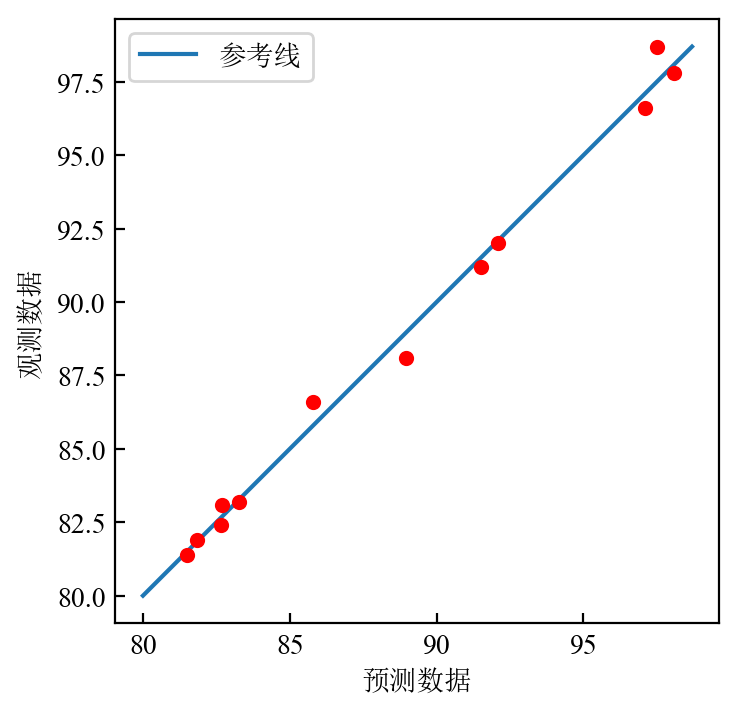

In [5]:
X0 = data[:, :-1]
X01 = np.hstack([np.ones((len(X0), 1)), X0])
Y0 = data[:, -1]
yhat = X01 @ coef0

fig, ax = plt.subplots()
ax.plot([80, Y0.max()], [80, Y0.max()], label="参考线")
ax.scatter(yhat, Y0, s=20, c='r', zorder=10)
ax.set_xlabel("预测数据")
ax.set_ylabel("观测数据")
ax.set_aspect(1)
ax.legend()
fig.show()

### 2
体质情况与运动能力的关系

In [6]:
data = np.loadtxt('../../../hw/13第13章  偏最小二乘回归分析习题解答/ti13_2.txt')
mu = data.mean(axis=0)
sig = data.std(axis=0, ddof=1)
R = np.corrcoef(data.T)
data_std = zscore(data, ddof=1)
X = data_std[:, :7]
Y = data_std[:, 7:]
n = X.shape[1]
m = Y.shape[1]
MSE = []
for i in range(1, n+1):
    pls = PLSRegression(i)
    y_cv = cross_val_predict(pls, X, Y)
    MSE.append(mean_squared_error(Y, y_cv))
comp_num = np.argmin(MSE) + 1
print("建议的成分个数：", comp_num)
MSE

建议的成分个数： 1


[0.8042428396530727,
 0.8504389863111138,
 0.8291999287962455,
 0.8712930681997421,
 0.8853371846856076,
 0.9161591012046495,
 0.8988437052820126]

但选择3个成分

In [7]:
md = PLSRegression(3).fit(X, Y)
coef = md.coef_
print("标准y对标准x的回归系数（每列）：\n", coef)

标准y对标准x的回归系数（每列）：
 [[-0.28071887  0.14351717  0.29879085  0.19099726 -0.36581812]
 [-0.16058435  0.34012013  0.21358408  0.25121989 -0.08078144]
 [-0.1656335   0.26348988  0.33554081  0.20043823 -0.34410435]
 [-0.17557818  0.08926013  0.01762801  0.13305824  0.05441684]
 [-0.37977701 -0.13698788  0.00165954  0.10472712 -0.07698425]
 [-0.02430122  0.18500115  0.17088745  0.10193042 -0.14092597]
 [-0.13151867  0.05156714 -0.09161871  0.09964375  0.20455665]]


In [8]:
coef0 = np.zeros((n+1, m))
coef0[0] = mu[n:] - mu[:n]/sig[:n] @ coef * sig[n:]
for i in range(m):
    coef0[1:, i] = sig[n+i]/sig[:n] * coef[:, i]
print("原始y对原始x的回归系数（每列）：\n", coef0)

原始y对原始x的回归系数（每列）：
 [[ 1.09360869e+01  1.02813409e+02  4.64596263e+00 -2.61199702e+01
   5.89143658e+02]
 [-2.93981637e-02  1.83110327e+00  2.44049736e-01  2.14595014e-01
  -3.38898579e+00]
 [-8.17970240e-03  2.11070242e+00  8.48526918e-02  1.37287880e-01
  -3.64000365e-01]
 [-3.72866470e-03  7.22652454e-01  5.89132470e-02  4.84093881e-02
  -6.85253499e-01]
 [-1.15594483e-02  7.15952927e-01  9.05174629e-03  9.39836362e-02
   3.16924543e-01]
 [-9.26479327e-03 -4.07145456e-01  3.15759490e-04  2.74100676e-02
  -1.66136439e-01]
 [-1.43943745e-03  1.33505615e+00  7.89473099e-02  6.47757467e-02
  -7.38433996e-01]
 [-5.69374447e-03  2.71984375e-01 -3.09355046e-02  4.62811888e-02
   7.83393753e-01]]


In [9]:
X0 = data[:, :7]
X01 = np.hstack([np.ones((len(X0), 1)), X0])
Y0 = data[:, 7:]
yhat = X01 @ coef0



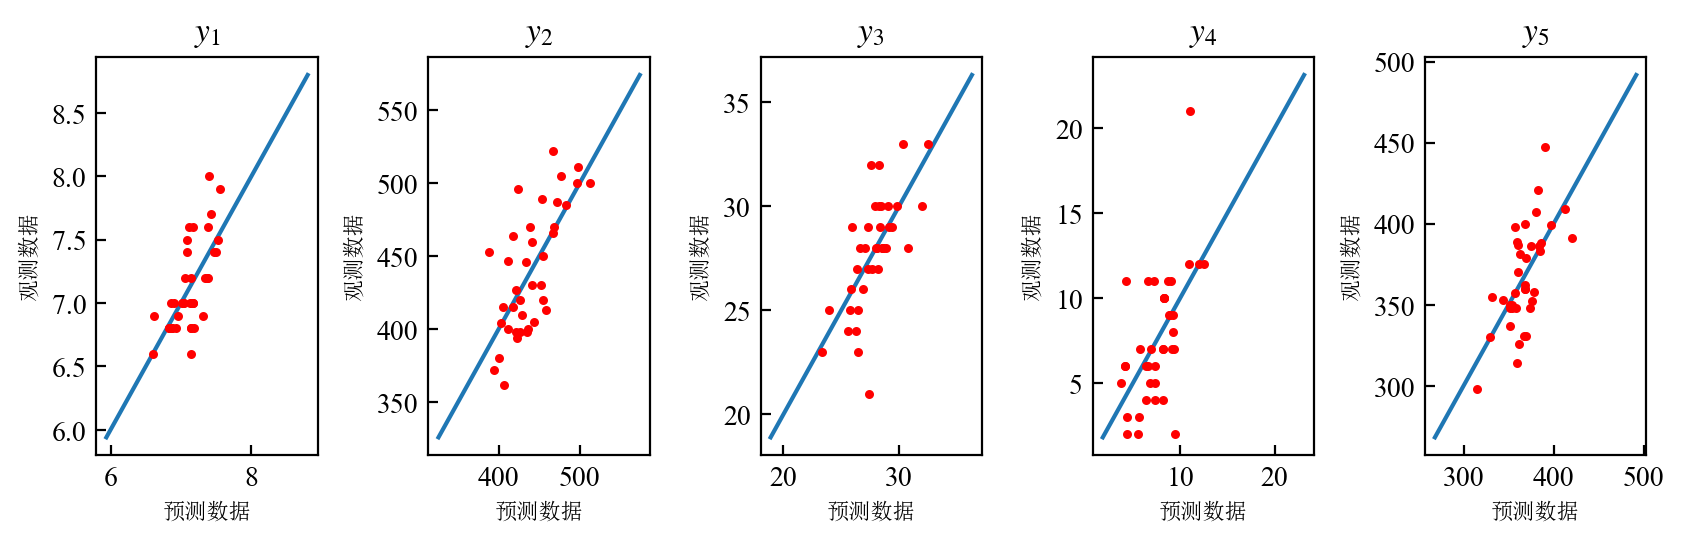

In [10]:
minY0 = Y0.min(axis=0)
maxY0 = Y0.max(axis=0)
titles = [f"$y_{str(i)}$" for i in range(1, 6)]
def drawPred(ax, ind):
    ax.plot([minY0[ind]*0.9, maxY0[ind]*1.1], [minY0[ind]*0.9, maxY0[ind]*1.1])
    ax.scatter(yhat[:, ind], Y0[:, ind], s=5, color='r', zorder=5)
    ax.set_box_aspect(1.8)
    ax.set_xlabel("预测数据", fontsize=8)
    ax.set_ylabel("观测数据", fontsize=8)
    ax.set_title(titles[ind])
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)
axs = [ax1, ax2, ax3, ax4, ax5]
for i in range(5):
    drawPred(axs[i], i)
fig.subplots_adjust(wspace=0.5)
